In [3]:
#perintah-perintah di bawah digunakan untuk mengambil fungis-fungsi dari suatu library tertentu
import numpy as np #berfungsi untuk memanggil import numpy yang diinisialkan dengan np
#library numpy digunakan untuk membuat array dan matriks
import cv2 #library cv2 digunakan untuk memodifikasi gambar
import matplotlib.pyplot as plt #berfungsi untuk memanggil import matplotlib.pyplot yang diinisialkan dengan plt
#library matplotlib digunakan untuk membuat sebuah visualisasi/diagram
import matplotlib.image as npimage #berfungsi untuk memanggil import matplotlib.image yang diinisialkan dengan npimage
#berfungsi untuk membaca gambar import

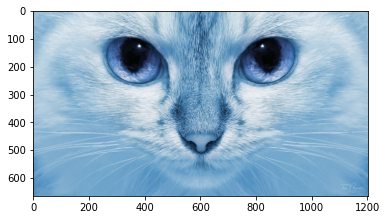

In [4]:
gambar = plt.imread('modul4.jpg') #untuk mengimport modul4.jpg kedalam variabel gambar
plt.imshow(gambar) #berfungsi untuk menampilkan gambar asli dari modul4.jpg

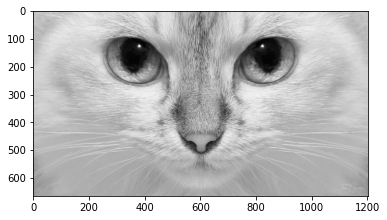

In [5]:
gambar = npimage.imread("modul4.jpg") #untuk mengimport modul4.jpg kedalam variabel gambar
gmbr = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)
#fungsi cv2.cvtColor digunakan untuk mengubah basis warna file, yang kemudian akan dimasukkan ke dalam variabel gmbr
#kemudian warna akan dirubah dari bgr menjadi grayscale menggunakan cv2.COLOR_BGR2GRAY dan dimasukkan ke variabel gmbr

#menampilkan gambar 
plt.imshow(gmbr, cmap='gray')
#plt.imshow digunakan untuk menampilkan gambar bersamaan dengan diagram jumlah baris dan kolomnya
#gambar yang ditampilkan adalah gambar dari variabel gmbr, dengan skala warna abu yang dipanggil dengan perintah cmap='gray'

In [6]:
row, col = gmbr.shape #membuat matriks sesuai ukuran gambar menggunakan 'gmbr.shape'
#membuat variabel untuk menampung hasil downsampling
r2 = int(row/2) 
c2 = int(col/2)

#inisalisasi filter
#variabel loow digunakan sebagai lowpass filter dan hig sebagai highpass filter
low = np.array([0.7071067811865476, 0.7071067811865476])  
high1 = np.array([-0.7071067811865476, 0.7071067811865476]) 
low1 = np.array([0.7071067811865476, 0.7071067811865476])
high2 = np.array([0.7071067811865476, -0.7071067811865476])

In [7]:
#membuat sebuah fungsi padding yang berfungsi untuk menambah padding ke proses downsampling 
#pada lowpass filter atau highpass filter
def padding(img, nPad):
    #
    hasil = np.pad(img, (0, nPad), 'constant')
    #mengembalikan nilai hasil
    return hasil

In [8]:
def konvolusi(img, kernel, step):
    if step == 1:
        hasil = np.zeros((row, col)) 
        for x in range(row):
            for y in range(col):
                for z in range(len(kernel)):
                    hasil[x, y] += (kernel[z]*img[x, y+z]) 
    else:
        hasil = np.zeros((row, c2)) 
        for x in range(row):
            for y in range(c2):
                for z in range(len(kernel)):
                    hasil[x, y] += (kernel[z]*img[z+x, y]) 

    return hasil 

In [9]:
def downsampling(img, step):
    if step == 1:
        hasil = np.zeros((row, col))
        for x in range(row):
            for y in range (c2):
                hasil[x, y] = img[x, y*2] 
    else:
        hasil = np.zeros((r2, c2)) 
        for x in range(r2):
            for y in range (c2):
                hasil[x, y] = img[x*2, y] 

    return hasil

In [10]:
def transpose(kernel):
    hasil = np.zeros((len(kernel), 1)) 
    for x in range(len(kernel)):
        for y in range(1):
            hasil[x, y] = kernel[x] 
    return hasil

In [11]:
pad=padding(gmbr, 1)
kv0=konvolusi(pad, low, 1)
pad_bw=downsampling(kv0, 1)
hasilT=transpose(low)
pad2=padding(pad_bw, 1)
data=konvolusi(pad2, hasilT, 2)
LL=downsampling(data, 2)
print(LL)

[[376.  375.  383.5 ... 381.  373.5 381. ]
 [381.  383.5 389.5 ... 389.5 381.5 380. ]
 [385.  393.5 395.  ... 399.5 391.5 383. ]
 ...
 [294.  294.5 299.  ... 307.5 303.5 304. ]
 [294.  295.  302.  ... 309.  305.5 304. ]
 [293.  296.  304.  ... 310.5 306.5 304. ]]


In [12]:
#HL (detail vertikal citra)
kv0=konvolusi(pad, high1, 1)
pad_bw=downsampling(kv0, 1)
hasilT=transpose(low)
pad2=padding(pad_bw, 1)
data=konvolusi(pad2, hasilT, 2)
HL=downsampling(data, 2)
print(HL)

[[-2.   2.   0.5 ...  0.  -2.5  0. ]
 [ 0.   1.5  0.5 ... -0.5 -2.5  0. ]
 [ 2.   1.5  0.  ... -0.5 -2.5  0. ]
 ...
 [ 0.   0.5  2.  ... -1.5 -0.5  0. ]
 [ 0.   1.   2.  ... -1.  -0.5  0. ]
 [ 1.   2.   2.  ... -1.5 -0.5  0. ]]


In [13]:
#LH (detail horizontal citra)
kv0=konvolusi(pad, low, 1)
pad_bw=downsampling(kv0, 1)
hasilT=transpose(high1)
pad2=padding(pad_bw, 1)
data=konvolusi(pad2, hasilT, 2)
LH=downsampling(data, 2)
print(LH)

[[ 0.   1.   0.5 ...  1.   0.5 -1. ]
 [ 2.   3.5  2.5 ...  3.5  3.5  2. ]
 [-1.   0.5 -1.  ...  0.5  0.5 -1. ]
 ...
 [ 0.   0.5  1.  ...  0.5  0.5  0. ]
 [ 0.   0.   0.  ...  0.   0.5  0. ]
 [ 0.   0.   0.  ...  0.5  0.5  0. ]]


In [14]:
#HH (detail diagonal citra)
kv0=konvolusi(pad, high1, 1)
pad_bw=downsampling(kv0, 1)
hasilT=transpose(high1)
pad2=padding(pad_bw, 1)
data=konvolusi(pad2, hasilT, 2)
HH=downsampling(data, 2)
print(HH)

[[ 0.0000000e+00 -2.0206059e-14 -5.0000000e-01 ...  0.0000000e+00
   5.0000000e-01  0.0000000e+00]
 [ 1.0000000e+00 -5.0000000e-01 -5.0000000e-01 ... -5.0000000e-01
  -5.0000000e-01  0.0000000e+00]
 [ 2.0206059e-14  5.0000000e-01  0.0000000e+00 ...  5.0000000e-01
   5.0000000e-01  0.0000000e+00]
 ...
 [ 0.0000000e+00  5.0000000e-01  0.0000000e+00 ... -5.0000000e-01
   5.0000000e-01  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   5.0000000e-01  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.0000000e-01
  -5.0000000e-01  0.0000000e+00]]


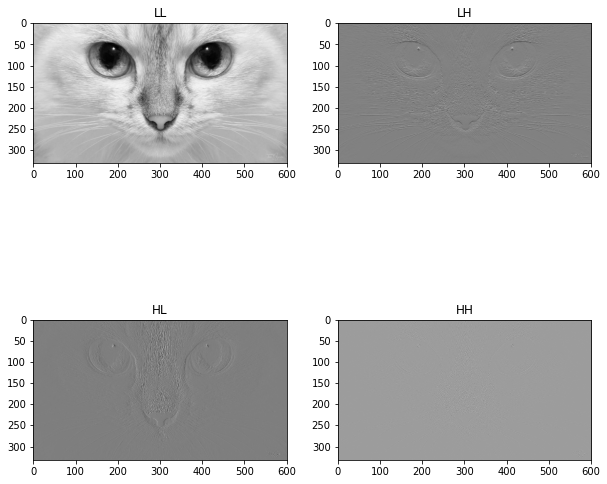

In [15]:
#menampilkan citra hasil dekomposisi dengan kernel dekomposisi haar
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(2, 2, 1)
plt.imshow(LL, cmap='gray') #menampilkan representasi aproksimasi citra
plt.title('LL')
fig.add_subplot(2, 2, 2)
plt.imshow(LH, cmap='gray') #menampilkan detail vertikal citra
plt.title('LH')
fig.add_subplot(2, 2, 3)
plt.imshow(HL, cmap='gray') #menampilkan detail horizontal citra
plt.title('HL')
fig.add_subplot(2, 2, 4)
plt.imshow(HH, cmap='gray') #menampilkan detail diagonal citra
plt.title('HH')
plt.show(block=True)